# Data Preparation

In [1]:
!pip install --upgrade gspread

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [2]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!wget --no-check-certificate -O /content/covid.csv \
  'https://docs.google.com/spreadsheet/ccc?key=1-xtxe3pVn1q46PMai1PvSxPrzvSrJeodiQd6Sp1Bg9s&output=csv'

--2021-01-12 12:43:23--  https://docs.google.com/spreadsheet/ccc?key=1-xtxe3pVn1q46PMai1PvSxPrzvSrJeodiQd6Sp1Bg9s&output=csv
Resolving docs.google.com (docs.google.com)... 172.217.2.110, 2607:f8b0:4004:814::200e
Connecting to docs.google.com (docs.google.com)|172.217.2.110|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://docs.google.com/spreadsheets/d/1-xtxe3pVn1q46PMai1PvSxPrzvSrJeodiQd6Sp1Bg9s/export?format=csv [following]
--2021-01-12 12:43:23--  https://docs.google.com/spreadsheets/d/1-xtxe3pVn1q46PMai1PvSxPrzvSrJeodiQd6Sp1Bg9s/export?format=csv
Reusing existing connection to docs.google.com:443.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0g-1s-sheets.googleusercontent.com/export/l5l039s6ni5uumqbsj9o11lmdc/juqf8f39p59a66ib1fr97h6cak/1610455400000/111036013464765321167/*/1-xtxe3pVn1q46PMai1PvSxPrzvSrJeodiQd6Sp1Bg9s?format=csv [following]
--2021-01-12 12:43:23--  https://doc-0g-1s-sheets.googl

In [4]:
covid_data = pd.read_csv('covid.csv')
covid_data

,Tanggal,Kasus baru,Total kasus,Kasus aktif,% kasus aktif,Sembuh baru,Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal baru,Meninggal Dunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases)
0,2-Mar,2,2,2,100.00%,0,0,0.00%,0,0,0,0.00%,NaN
1,3-Mar,0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN
2,4-Mar,0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN
3,5-Mar,0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN
4,6-Mar,2,4,4,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,3-Dec,"8,369","557,877","77,969",13.98%,"3,673","462,553",82.91%,96.38%,156,"17,355",3.11%,3.62%
276,4-Dec,"5,803","563,680","80,023",14.20%,"3,625","466,178",82.70%,96.39%,124,"17,479",3.10%,3.61%
277,5-Dec,"6,027","569,707","81,669",14.34%,"4,271","470,449",82.58%,96.40%,110,"17,589",3.09%,3.60%
278,6-Dec,"6,089","575,796","83,285",14.46%,"4,322","474,771",82.45%,96.40%,151,"17,740",3.08%,3.60%


In [5]:
covid_data = covid_data[['Kasus baru', 'Sembuh baru','Meninggal baru']]
covid_data

,Kasus baru,Sembuh baru,Meninggal baru
0,2,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,2,0,0
...,...,...,...
275,"8,369","3,673",156
276,"5,803","3,625",124
277,"6,027","4,271",110
278,"6,089","4,322",151


In [6]:
covid_data = covid_data.astype(str)
covid_data = covid_data.apply(lambda x: x.str.replace(',', ''))
covid_data = covid_data.values.astype(int)
covid_data = pd.DataFrame(covid_data)
covid_data.columns = ['Kasus baru', 'Sembuh baru','Meninggal baru']
covid_data

,Kasus baru,Sembuh baru,Meninggal baru
0,2,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,2,0,0
...,...,...,...
275,8369,3673,156
276,5803,3625,124
277,6027,4271,110
278,6089,4322,151


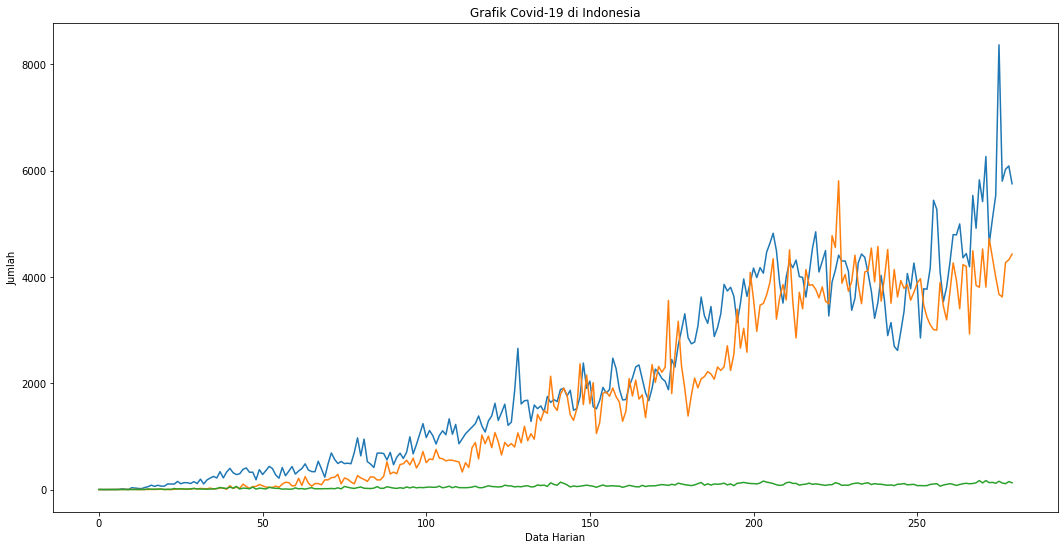

In [7]:
plt.subplots(figsize=(18, 9))    
plt.title('Grafik Covid-19 di Indonesia')
plt.xlabel('Data Harian')
plt.ylabel('Jumlah')
plt.plot(covid_data['Kasus baru'], label='Kasus baru')
plt.plot(covid_data['Sembuh baru'], label='Sembuh baru')
plt.plot(covid_data['Meninggal baru'], label='Meninggal baru')
plt.show()

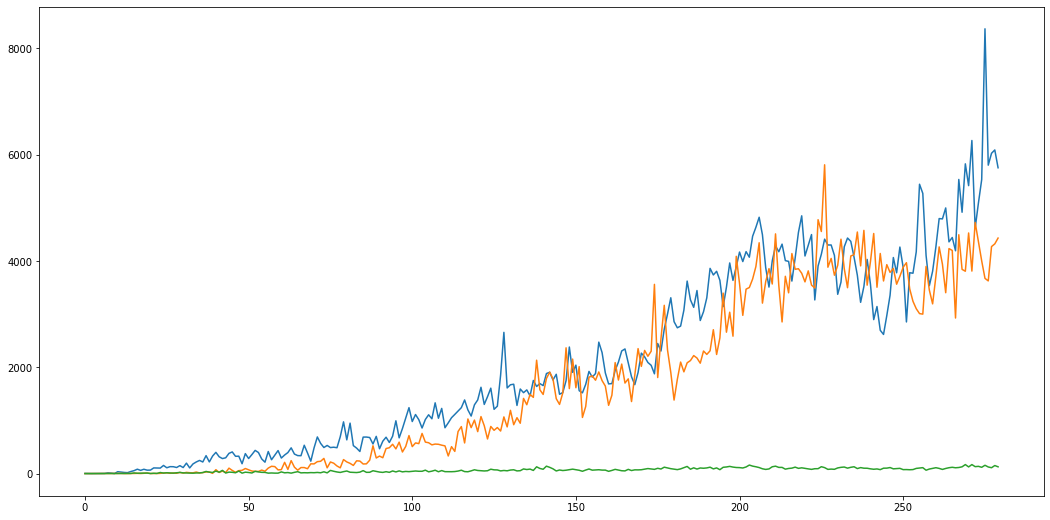

In [8]:
death_data = covid_data[['Meninggal baru']]
plt.subplots(figsize=(18, 9))
plt.plot(covid_data)
plt.show()

# Data Eval (28 hari)

Data Processing

In [9]:
covid_data = death_data.values.astype(float)

In [10]:
test_data_size = 28

train_data = covid_data[:-test_data_size]
test_data = covid_data[-test_data_size:]

In [11]:
print(len(train_data))
print(len(test_data))

252
28


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
train_data_normalized = scaler.fit_transform(train_data.reshape(-1,1))

In [13]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
[[ 0.1125]
 [ 0.175 ]
 [ 0.225 ]
 [-0.075 ]
 [-0.0625]]


In [14]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [15]:
train_window = 28

In [16]:
def create_inout_sequences(input_data, tw):
  inout_seq = []
  L = len(input_data)
  for i in range(L-tw):
    train_seq = input_data[i:i+tw]
    train_label = input_data[i+tw:i+tw+1]
    inout_seq.append((train_seq, train_label))
  return inout_seq

In [17]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [18]:
train_inout_seq[:5]

[(tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.9750, -1.0000, -0.9875, -1.0000, -1.0000, -0.9750, -0.8500,
          -0.9250, -0.9125, -0.9250, -0.8750, -0.9875, -0.9250, -0.9625, -0.7500,
          -0.8875, -0.8125, -0.8500, -0.9000]), tensor([-0.8250])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -0.9750, -1.0000, -0.9875, -1.0000, -1.0000, -0.9750, -0.8500, -0.9250,
          -0.9125, -0.9250, -0.8750, -0.9875, -0.9250, -0.9625, -0.7500, -0.8875,
          -0.8125, -0.8500, -0.9000, -0.8250]),
  tensor([-0.7375])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9750,
          -1.0000, -0.9875, -1.0000, -1.0000, -0.9750, -0.8500, -0.9250, -0.9125,
          -0.9250, -0.8750, -0.9875, -0.9250, -0.9625, -0.7500, -0.8875, -0.8125,
          -0.8500, -0.9000, -0.8250, -0.7375]), tensor([-0.8375])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -

**LSTM Model**

In [19]:
class LSTM(nn.Module):
  def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
    super().__init__()
    self.hidden_layer_size = hidden_layer_size
    self.lstm = nn.LSTM(input_size, hidden_layer_size)
    self.linear = nn.Linear(hidden_layer_size, output_size)
    self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                        torch.zeros(1,1,self.hidden_layer_size))
    
  def forward(self, input_seq):
    lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
    predictions = self.linear(lstm_out.view(len(input_seq), -1))
    return predictions[-1]

In [20]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [21]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


**Training the Model**

In [22]:
epochs = 150

for i in range(epochs):
  for seq, labels in train_inout_seq:
    optimizer.zero_grad()
    model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                         torch.zeros(1, 1, model.hidden_layer_size))
    
    y_pred = model(seq)

    single_loss = loss_function(y_pred, labels)
    single_loss.backward()
    optimizer.step()

  if i%25==1:
    print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.05868733
epoch:  26 loss: 0.05662975
epoch:  51 loss: 0.07628842
epoch:  76 loss: 0.05941499
epoch: 101 loss: 0.05987618
epoch: 126 loss: 0.01809128
epoch: 149 loss: 0.0081334691


**Making Predictions**

In [23]:
fut_pred = 28

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.15000000596046448, 0.612500011920929, 0.4000000059604645, -0.012500000186264515, 0.05000000074505806, 0.0, 0.32499998807907104, 0.4625000059604645, 0.5375000238418579, 0.2750000059604645, 0.4749999940395355, 0.6000000238418579, 0.17499999701976776, 0.4000000059604645, 0.26249998807907104, 0.25, 0.11249999701976776, 0.012500000186264515, 0.08749999850988388, -0.07500000298023224, 0.26249998807907104, 0.2750000059604645, 0.4124999940395355, 0.11249999701976776, 0.17499999701976776, 0.22499999403953552, -0.07500000298023224, -0.0625]


In [24]:
model.eval()

for i in range(fut_pred):
  seq = torch.FloatTensor(test_inputs[-train_window:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                    torch.zeros(1, 1, model.hidden_layer_size))
    test_inputs.append(model(seq).item())

In [25]:
test_inputs[fut_pred:]

[-0.0063555315136909485,
 0.13973350822925568,
 0.27879196405410767,
 0.07350234687328339,
 0.13694219291210175,
 0.11808517575263977,
 0.04861650988459587,
 0.4666096866130829,
 0.23296456038951874,
 0.3253018260002136,
 0.25930526852607727,
 0.15008975565433502,
 0.12596772611141205,
 0.08852130174636841,
 0.2008352428674698,
 0.46090883016586304,
 0.4833325445652008,
 0.2977932095527649,
 0.3276313543319702,
 0.29204291105270386,
 0.3578528165817261,
 0.4858052730560303,
 0.6759430766105652,
 0.5413046479225159,
 0.3390945792198181,
 0.27335479855537415,
 0.21505920588970184,
 0.39964503049850464]

In [26]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[ 79.49155748]
 [ 91.17868066]
 [102.30335712]
 [ 85.88018775]
 [ 90.95537543]
 [ 89.44681406]
 [ 83.88932079]
 [117.32877493]
 [ 98.63716483]
 [106.02414608]
 [100.74442148]
 [ 92.00718045]
 [ 90.07741809]
 [ 87.08170414]
 [ 96.06681943]
 [116.87270641]
 [118.66660357]
 [103.82345676]
 [106.21050835]
 [103.36343288]
 [108.62822533]
 [118.86442184]
 [134.07544613]
 [123.30437183]
 [107.12756634]
 [101.86838388]
 [ 97.20473647]
 [111.97160244]]


In [27]:
x = np.arange(252, 280, 1)

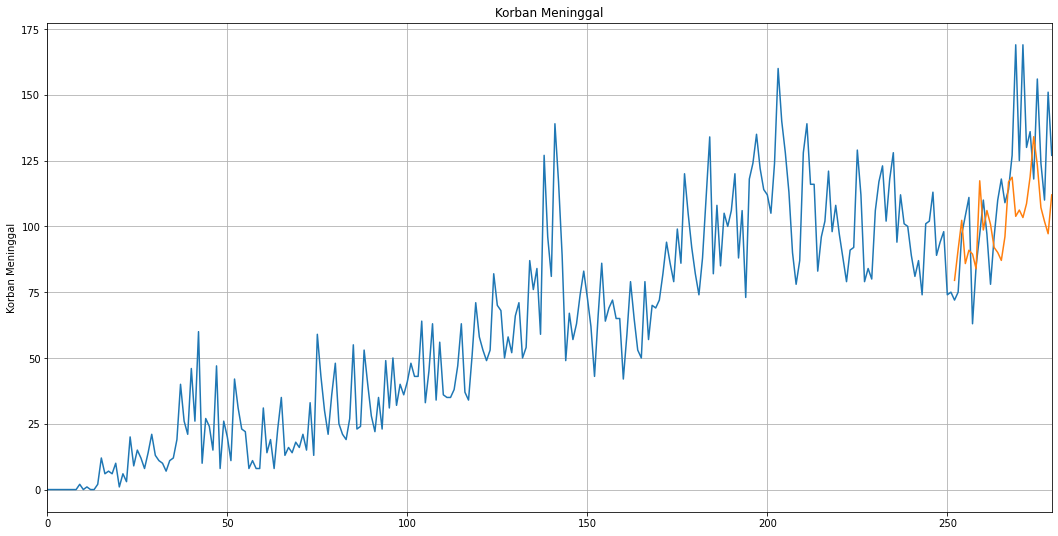

In [28]:
plt.subplots(figsize=(18, 9))
plt.title('Korban Meninggal')
plt.ylabel('Korban Meninggal')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(covid_data)
plt.plot(x,actual_predictions)
plt.show()

In [29]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print('Mean Square Error : \n', rmse(covid_data[-28:],actual_predictions))

Mean Square Error : 
 26.04202086286413


# Data Eval (14 hari)

**Data Processing**

In [30]:
covid_data = death_data.values.astype(float)

In [31]:
test_data_size = 14

train_data = covid_data[:-test_data_size]
test_data = covid_data[-test_data_size:]

In [32]:
print(len(train_data))
print(len(test_data))

266
14


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
train_data_normalized = scaler.fit_transform(train_data.reshape(-1,1))

In [34]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
[[ 0.2125]
 [-0.025 ]
 [ 0.2   ]
 [ 0.375 ]
 [ 0.475 ]]


In [35]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [36]:
train_window = 14

In [37]:
def create_inout_sequences(input_data, tw):
  inout_seq = []
  L = len(input_data)
  for i in range(L-tw):
    train_seq = input_data[i:i+tw]
    train_label = input_data[i+tw:i+tw+1]
    inout_seq.append((train_seq, train_label))
  return inout_seq

In [38]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)
train_inout_seq[:5]

[(tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.9750, -1.0000, -0.9875, -1.0000, -1.0000]),
  tensor([-0.9750])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -0.9750, -1.0000, -0.9875, -1.0000, -1.0000, -0.9750]),
  tensor([-0.8500])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9750,
          -1.0000, -0.9875, -1.0000, -1.0000, -0.9750, -0.8500]),
  tensor([-0.9250])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9750, -1.0000,
          -0.9875, -1.0000, -1.0000, -0.9750, -0.8500, -0.9250]),
  tensor([-0.9125])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9750, -1.0000, -0.9875,
          -1.0000, -1.0000, -0.9750, -0.8500, -0.9250, -0.9125]),
  tensor([-0.9250]))]

**LSTM Model**

In [39]:
class LSTM(nn.Module):
  def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
    super().__init__()
    self.hidden_layer_size = hidden_layer_size
    self.lstm = nn.LSTM(input_size, hidden_layer_size)
    self.linear = nn.Linear(hidden_layer_size, output_size)
    self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                        torch.zeros(1,1,self.hidden_layer_size))
    
  def forward(self, input_seq):
    lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
    predictions = self.linear(lstm_out.view(len(input_seq), -1))
    return predictions[-1]

In [40]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


**Training the Model**

In [41]:
epochs = 150

for i in range(epochs):
  for seq, labels in train_inout_seq:
    optimizer.zero_grad()
    model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                         torch.zeros(1, 1, model.hidden_layer_size))
    
    y_pred = model(seq)

    single_loss = loss_function(y_pred, labels)
    single_loss.backward()
    optimizer.step()

  if i%25==1:
    print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.08932340
epoch:  26 loss: 0.02953418
epoch:  51 loss: 0.00132044
epoch:  76 loss: 0.00245278
epoch: 101 loss: 0.00025991
epoch: 126 loss: 0.00023693
epoch: 149 loss: 0.0062810266


**Making Predictions**

In [42]:
fut_pred = 14

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[-0.10000000149011612, -0.0625, 0.21250000596046448, 0.30000001192092896, 0.38749998807907104, -0.21250000596046448, 0.0625, 0.21250000596046448, 0.375, 0.21250000596046448, -0.02500000037252903, 0.20000000298023224, 0.375, 0.4749999940395355]


In [43]:
model.eval()

for i in range(fut_pred):
  seq = torch.FloatTensor(test_inputs[-train_window:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                    torch.zeros(1, 1, model.hidden_layer_size))
    test_inputs.append(model(seq).item())

In [44]:
test_inputs[fut_pred:]

[0.35417377948760986,
 0.2292041927576065,
 0.19585572183132172,
 0.17917095124721527,
 0.48706039786338806,
 0.6669344902038574,
 0.5625632405281067,
 0.30881834030151367,
 0.21060709655284882,
 0.09596991539001465,
 0.5085985660552979,
 0.936626672744751,
 0.5669490694999695,
 0.4777698814868927]

In [45]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[108.33390236]
 [ 98.33633542]
 [ 95.66845775]
 [ 94.3336761 ]
 [118.96483183]
 [133.35475922]
 [125.00505924]
 [104.70546722]
 [ 96.84856772]
 [ 87.67759323]
 [120.68788528]
 [154.93013382]
 [125.35592556]
 [118.22159052]]


In [46]:
x = np.arange(266, 280, 1)

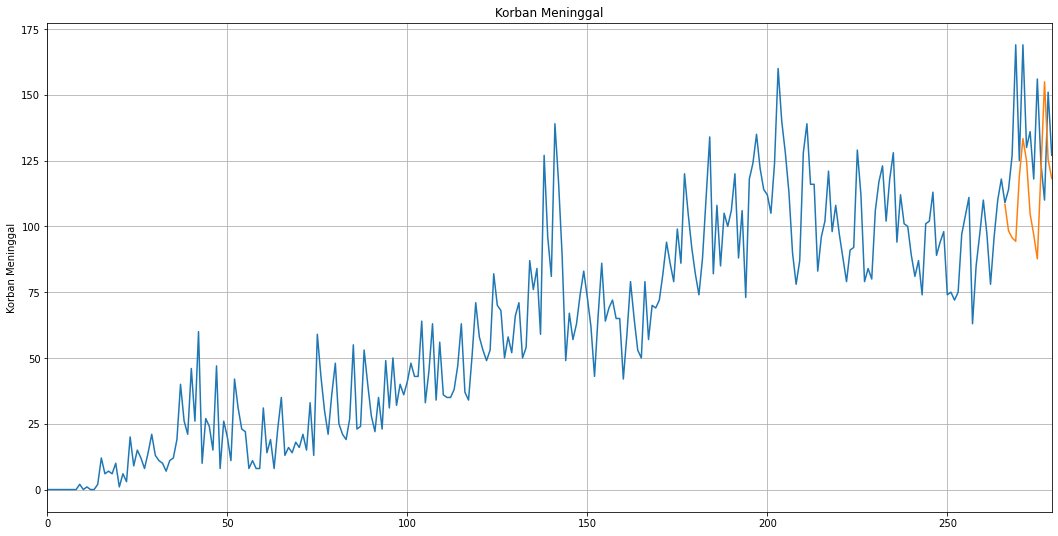

In [47]:
plt.subplots(figsize=(18, 9))
plt.title('Korban Meninggal')
plt.ylabel('Korban Meninggal')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(covid_data)
plt.plot(x,actual_predictions)
plt.show()

In [48]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print('Mean Square Error : \n', rmse(covid_data[-14:],actual_predictions))

Mean Square Error : 
 34.83996433584864


# Data Eval (7 hari)

**Data Processing**

In [49]:
covid_data = death_data.values.astype(float)

In [50]:
test_data_size = 7

train_data = covid_data[:-test_data_size]
test_data = covid_data[-test_data_size:]

In [51]:
print(len(train_data))
print(len(test_data))

273
7


In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
train_data_normalized = scaler.fit_transform(train_data.reshape(-1,1))

In [53]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
[[0.50295858]
 [1.        ]
 [0.47928994]
 [1.        ]
 [0.53846154]]


In [54]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [55]:
train_window = 7

In [56]:
def create_inout_sequences(input_data, tw):
  inout_seq = []
  L = len(input_data)
  for i in range(L-tw):
    train_seq = input_data[i:i+tw]
    train_label = input_data[i+tw:i+tw+1]
    inout_seq.append((train_seq, train_label))
  return inout_seq

In [57]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)
train_inout_seq[:5]

[(tensor([-1., -1., -1., -1., -1., -1., -1.]), tensor([-1.])),
 (tensor([-1., -1., -1., -1., -1., -1., -1.]), tensor([-1.])),
 (tensor([-1., -1., -1., -1., -1., -1., -1.]), tensor([-0.9763])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9763]),
  tensor([-1.])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9763, -1.0000]),
  tensor([-0.9882]))]

**LSTM Model**

In [58]:
class LSTM(nn.Module):
  def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
    super().__init__()
    self.hidden_layer_size = hidden_layer_size
    self.lstm = nn.LSTM(input_size, hidden_layer_size)
    self.linear = nn.Linear(hidden_layer_size, output_size)
    self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                        torch.zeros(1,1,self.hidden_layer_size))
    
  def forward(self, input_seq):
    lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
    predictions = self.linear(lstm_out.view(len(input_seq), -1))
    return predictions[-1]

In [59]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


**Training the Model**

In [60]:
epochs = 150

for i in range(epochs):
  for seq, labels in train_inout_seq:
    optimizer.zero_grad()
    model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                         torch.zeros(1, 1, model.hidden_layer_size))
    
    y_pred = model(seq)

    single_loss = loss_function(y_pred, labels)
    single_loss.backward()
    optimizer.step()

  if i%25==1:
    print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.02785760
epoch:  26 loss: 0.00514240
epoch:  51 loss: 0.00085768
epoch:  76 loss: 0.01363667
epoch: 101 loss: 0.01261893
epoch: 126 loss: 0.00437939
epoch: 149 loss: 0.0009141187


**Making Predictions**

In [61]:
fut_pred = 7

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.28994083404541016, 0.3491124212741852, 0.5029585957527161, 1.0, 0.4792899489402771, 1.0, 0.5384615659713745]


In [62]:
model.eval()

for i in range(fut_pred):
  seq = torch.FloatTensor(test_inputs[-train_window:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                    torch.zeros(1, 1, model.hidden_layer_size))
    test_inputs.append(model(seq).item())

In [63]:
test_inputs[fut_pred:]

[0.5710657238960266,
 0.35607630014419556,
 0.2996925711631775,
 0.24733701348304749,
 0.013833608478307724,
 0.1645938754081726,
 0.1545235961675644]

In [64]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[132.75505367]
 [114.58844736]
 [109.82402226]
 [105.39997764]
 [ 85.66893992]
 [ 98.40818247]
 [ 97.55724388]]


In [65]:
x = np.arange(273, 280, 1)

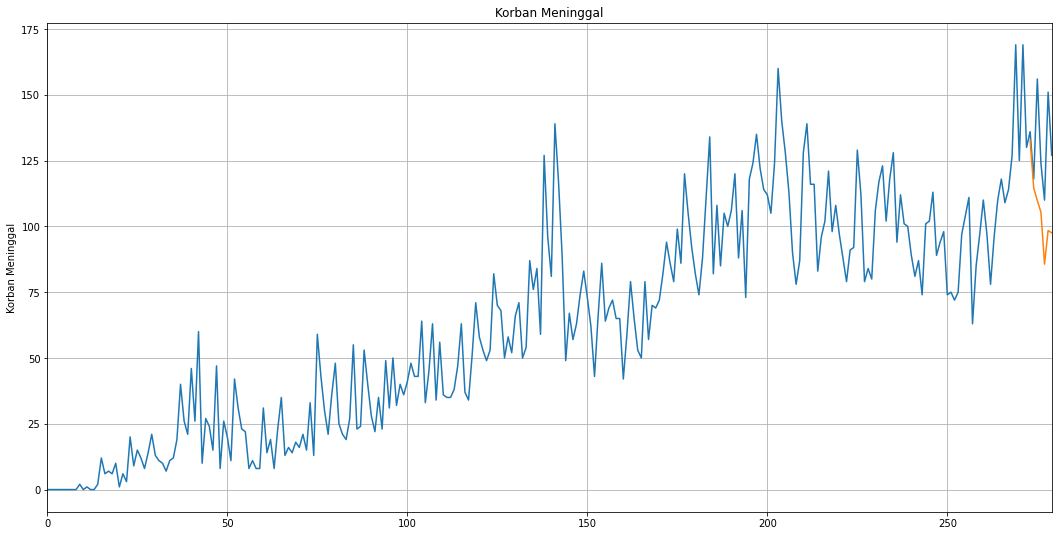

In [66]:
plt.subplots(figsize=(18, 9))
plt.title('Korban Meninggal')
plt.ylabel('Korban Meninggal')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(covid_data)
plt.plot(x,actual_predictions)
plt.show()

In [67]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print('Mean Square Error : \n', rmse(covid_data[-7:],actual_predictions))

Mean Square Error : 
 30.995681182355895


# Data Eval (2 hari)

**Data Processing**

In [68]:
covid_data = death_data.values.astype(float)

In [69]:
test_data_size = 2

train_data = covid_data[:-test_data_size]
test_data = covid_data[-test_data_size:]

In [70]:
print(len(train_data))
print(len(test_data))

278
2


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
train_data_normalized = scaler.fit_transform(train_data.reshape(-1,1))

In [72]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
[[0.60946746]
 [0.3964497 ]
 [0.84615385]
 [0.46745562]
 [0.30177515]]


In [73]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [74]:
train_window = 2

In [75]:
def create_inout_sequences(input_data, tw):
  inout_seq = []
  L = len(input_data)
  for i in range(L-tw):
    train_seq = input_data[i:i+tw]
    train_label = input_data[i+tw:i+tw+1]
    inout_seq.append((train_seq, train_label))
  return inout_seq

In [76]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)
train_inout_seq[:5]

[(tensor([-1., -1.]), tensor([-1.])),
 (tensor([-1., -1.]), tensor([-1.])),
 (tensor([-1., -1.]), tensor([-1.])),
 (tensor([-1., -1.]), tensor([-1.])),
 (tensor([-1., -1.]), tensor([-1.]))]

**LSTM Model**

In [77]:
class LSTM(nn.Module):
  def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
    super().__init__()
    self.hidden_layer_size = hidden_layer_size
    self.lstm = nn.LSTM(input_size, hidden_layer_size)
    self.linear = nn.Linear(hidden_layer_size, output_size)
    self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                        torch.zeros(1,1,self.hidden_layer_size))
    
  def forward(self, input_seq):
    lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
    predictions = self.linear(lstm_out.view(len(input_seq), -1))
    return predictions[-1]

In [78]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


**Training the Model**

In [79]:
epochs = 150

for i in range(epochs):
  for seq, labels in train_inout_seq:
    optimizer.zero_grad()
    model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                         torch.zeros(1, 1, model.hidden_layer_size))
    
    y_pred = model(seq)

    single_loss = loss_function(y_pred, labels)
    single_loss.backward()
    optimizer.step()

  if i%25==1:
    print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.05354886
epoch:  26 loss: 0.02756910
epoch:  51 loss: 0.02222979
epoch:  76 loss: 0.01920469
epoch: 101 loss: 0.01712374
epoch: 126 loss: 0.01552757
epoch: 149 loss: 0.0144327786


**Making Predictions**

In [80]:
fut_pred = 2

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.4674556255340576, 0.30177515745162964]


In [81]:
model.eval()

for i in range(fut_pred):
  seq = torch.FloatTensor(test_inputs[-train_window:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                    torch.zeros(1, 1, model.hidden_layer_size))
    test_inputs.append(model(seq).item())

In [82]:
test_inputs[fut_pred:]

[0.36109521985054016, 0.36930719017982483]

In [83]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[115.01254608]
 [115.70645757]]


In [84]:
x = np.arange(5, 7, 1)
show_data = covid_data[-7:]
print(show_data)

[[136.]
 [118.]
 [156.]
 [124.]
 [110.]
 [151.]
 [127.]]


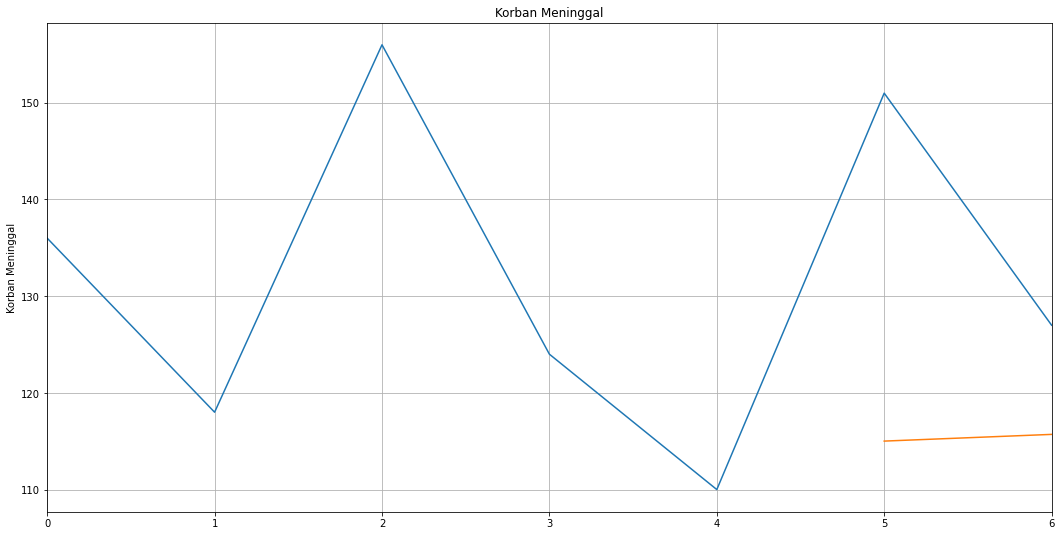

In [85]:
plt.subplots(figsize=(18, 9))
plt.title('Korban Meninggal')
plt.ylabel('Korban Meninggal')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(show_data)
plt.plot(x,actual_predictions)
plt.show()

In [86]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print('Mean Square Error : \n', rmse(covid_data[-2],actual_predictions))

Mean Square Error : 
 35.64218692138435


# Data Predict

**Data Processing**

In [87]:
covid_data = death_data.values.astype(float)

In [88]:
test_data_size = 28

train_data = covid_data[:-test_data_size]
test_data = covid_data[-test_data_size:]

In [89]:
print(len(train_data))
print(len(test_data))

252
28


In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
train_data_normalized = scaler.fit_transform(train_data.reshape(-1,1))

In [91]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [92]:
train_window = 28

In [93]:
def create_inout_sequences(input_data, tw):
  inout_seq = []
  L = len(input_data)
  for i in range(L-tw):
    train_seq = input_data[i:i+tw]
    train_label = input_data[i+tw:i+tw+1]
    inout_seq.append((train_seq, train_label))
  return inout_seq

In [94]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [95]:
train_inout_seq[:5]

[(tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.9750, -1.0000, -0.9875, -1.0000, -1.0000, -0.9750, -0.8500,
          -0.9250, -0.9125, -0.9250, -0.8750, -0.9875, -0.9250, -0.9625, -0.7500,
          -0.8875, -0.8125, -0.8500, -0.9000]), tensor([-0.8250])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -0.9750, -1.0000, -0.9875, -1.0000, -1.0000, -0.9750, -0.8500, -0.9250,
          -0.9125, -0.9250, -0.8750, -0.9875, -0.9250, -0.9625, -0.7500, -0.8875,
          -0.8125, -0.8500, -0.9000, -0.8250]),
  tensor([-0.7375])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9750,
          -1.0000, -0.9875, -1.0000, -1.0000, -0.9750, -0.8500, -0.9250, -0.9125,
          -0.9250, -0.8750, -0.9875, -0.9250, -0.9625, -0.7500, -0.8875, -0.8125,
          -0.8500, -0.9000, -0.8250, -0.7375]), tensor([-0.8375])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -

**LSTM Model**

In [96]:
class LSTM(nn.Module):
  def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
    super().__init__()
    self.hidden_layer_size = hidden_layer_size
    self.lstm = nn.LSTM(input_size, hidden_layer_size)
    self.linear = nn.Linear(hidden_layer_size, output_size)
    self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                        torch.zeros(1,1,self.hidden_layer_size))
    
  def forward(self, input_seq):
    lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
    predictions = self.linear(lstm_out.view(len(input_seq), -1))
    return predictions[-1]

In [97]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [98]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


**Training the Model**

In [99]:
epochs = 150

for i in range(epochs):
  for seq, labels in train_inout_seq:
    optimizer.zero_grad()
    model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                         torch.zeros(1, 1, model.hidden_layer_size))
    
    y_pred = model(seq)

    single_loss = loss_function(y_pred, labels)
    single_loss.backward()
    optimizer.step()

  if i%25==1:
    print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.05784345
epoch:  26 loss: 0.05645845
epoch:  51 loss: 0.06308878
epoch:  76 loss: 0.03482480
epoch: 101 loss: 0.02147228
epoch: 126 loss: 0.09674172
epoch: 149 loss: 0.0003406271


**Make Predictions**

In [100]:
fut_pred = 28

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.15000000596046448, 0.612500011920929, 0.4000000059604645, -0.012500000186264515, 0.05000000074505806, 0.0, 0.32499998807907104, 0.4625000059604645, 0.5375000238418579, 0.2750000059604645, 0.4749999940395355, 0.6000000238418579, 0.17499999701976776, 0.4000000059604645, 0.26249998807907104, 0.25, 0.11249999701976776, 0.012500000186264515, 0.08749999850988388, -0.07500000298023224, 0.26249998807907104, 0.2750000059604645, 0.4124999940395355, 0.11249999701976776, 0.17499999701976776, 0.22499999403953552, -0.07500000298023224, -0.0625]


In [101]:
model.eval()

for i in range(fut_pred):
  seq = torch.FloatTensor(test_inputs[-train_window:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                    torch.zeros(1, 1, model.hidden_layer_size))
    test_inputs.append(model(seq).item())

In [102]:
test_inputs[fut_pred:]

[0.05903828144073486,
 0.23455308377742767,
 0.17174312472343445,
 0.03246770799160004,
 -0.024755556136369705,
 0.07213620096445084,
 0.30596473813056946,
 0.48021289706230164,
 0.3628567159175873,
 0.24426953494548798,
 0.11387110501527786,
 0.036466240882873535,
 0.048055246472358704,
 0.20267900824546814,
 0.6169595122337341,
 0.44076645374298096,
 0.12915164232254028,
 0.24000371992588043,
 0.18152831494808197,
 0.41435152292251587,
 0.4236336946487427,
 0.3588845431804657,
 0.24462269246578217,
 0.09129810333251953,
 0.006101842969655991,
 0.024339990690350533,
 0.23722019791603088,
 0.5912386775016785]

In [103]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[ 84.72306252]
 [ 98.7642467 ]
 [ 93.73944998]
 [ 82.59741664]
 [ 78.01955551]
 [ 85.77089608]
 [104.47717905]
 [118.41703176]
 [109.02853727]
 [ 99.5415628 ]
 [ 89.1096884 ]
 [ 82.91729927]
 [ 83.84441972]
 [ 96.21432066]
 [129.35676098]
 [115.2613163 ]
 [ 90.33213139]
 [ 99.20029759]
 [ 94.5222652 ]
 [113.14812183]
 [113.89069557]
 [108.71076345]
 [ 99.5698154 ]
 [ 87.30384827]
 [ 80.48814744]
 [ 81.94719926]
 [ 98.97761583]
 [127.2990942 ]]


In [104]:
x = np.arange(280, 308, 1)
print(x)

[280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307]


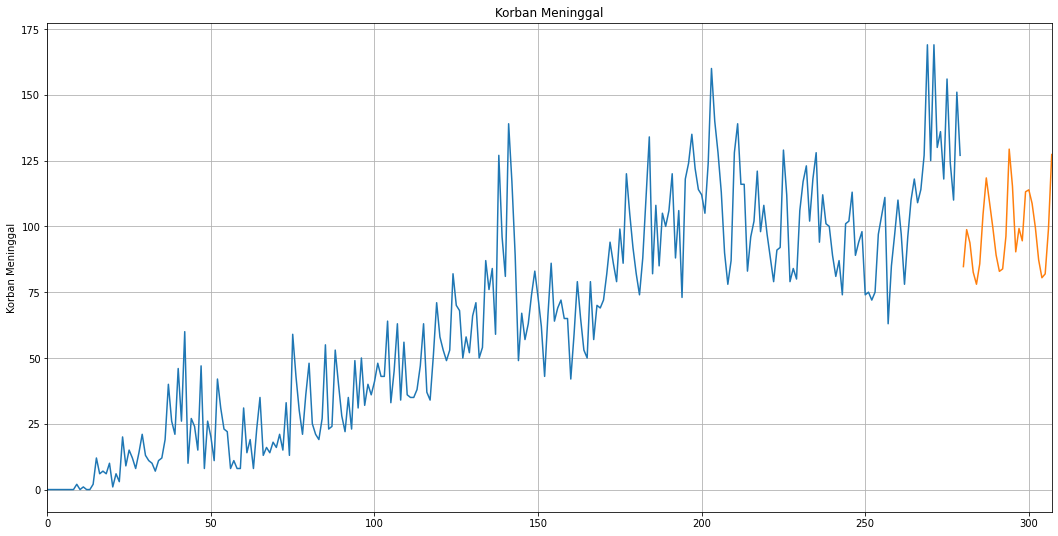

In [105]:
plt.subplots(figsize=(18, 9))
plt.title('Korban Meninggal')
plt.ylabel('Korban Meninggal')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(covid_data)
plt.plot(x,actual_predictions)
plt.show()